<a href="https://colab.research.google.com/github/ewjohn127/dsc_project_1/blob/main/Phase1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import csv
import sqlite3

# Proof of Concept Goal - Show Studio Can Be Successful At Turning A Profit

Accomplishing this goal involves looking at types of movies that lend themselves to high profitability. In addition, partnering with a studio that is experienced in making these types of movies will help to lay the framework for the new studio's success.

The Bottom Line - Demonstrating profitability at the start will encourage studios, producers, filmcrew and actors to participate in future projects.

* Genre Profitability
* Profitability v Movie Budget
* Example of Movies Fitting This Model

Genre is the best way to breakdown types of movies as it can define the entire production process. For example, below are the top 10 grossing movies for the Action/Adventure/Sci-Fi genre:

In [22]:
pd.read_csv('data/idea1_aas.csv').loc[:10 ,'Movie Title':]

,Movie Title,Budget (USD),Total Gross (USD),Profitability (GM%),Release Year,Average IMDB Rating,Director
0,Jurassic World,"$215,000,000","$2,301,125,489",90.66,2015,7.0,Colin Trevorrow
1,The Avengers,"$225,000,000","$2,141,215,444",89.49,2012,8.0,Joss Whedon
2,Black Panther,"$200,000,000","$2,048,317,790",90.24,2018,7.3,Ryan Coogler
3,Avengers: Age of Ultron,"$330,600,000","$1,862,019,831",82.25,2015,7.3,Joss Whedon
4,Jurassic World: Fallen Kingdom,"$170,000,000","$1,723,492,559",90.14,2018,6.2,J.A. Bayona
5,Iron Man 3,"$200,000,000","$1,624,384,544",87.69,2013,7.1,Shane Black
6,Rogue One: A Star Wars Story,"$200,000,000","$1,581,280,180",87.35,2016,7.8,Gareth Edwards
7,Transformers: Dark of the Moon,"$195,000,000","$1,476,181,086",86.79,2011,6.2,Michael Bay
8,Transformers: Age of Extinction,"$210,000,000","$1,349,478,152",84.44,2014,5.6,Michael Bay
9,The Hunger Games: Catching Fire,"$130,000,000","$1,289,536,094",89.92,2013,7.5,Francis Lawrence


Immediately what comes to mind are elaborate film sets, stunt teams and a star-studded cast. Compare this to the top 10 grosing movies from the Adventure/Animation/Comedy genre:

In [25]:
pd.read_csv('data/idea1_aac.csv').loc[:10 ,'Movie Title':]

,Movie Title,Budget (USD),Total Gross (USD),Profitability (GM%),Release Year,Average IMDB Rating,Director
0,Monsters University,"$200,000,000","$1,012,076,658",80.24,2013,7.2,Dan Scanlon
1,Shrek Forever After,"$165,000,000","$994,981,460",83.42,2010,6.3,Mike Mitchell
2,The Smurfs,"$110,000,000","$706,363,481",84.43,2011,5.4,Raja Gosnell
3,Hotel Transylvania 3: Summer Vacation,"$65,000,000","$694,580,054",90.64,2018,6.3,Genndy Tartakovsky
4,Wreck-It Ralph,"$165,000,000","$685,924,198",75.94,2012,7.7,Rich Moore
5,Rio,"$90,000,000","$631,139,618",85.74,2011,6.9,Carlos Saldanha
6,Rio 2,"$130,000,000","$624,384,726",79.18,2014,6.3,Carlos Saldanha
7,Home,"$130,000,000","$563,395,406",76.93,2015,6.6,Tim Johnson
8,Alvin and the Chipmunks: Chipwrecked,"$80,000,000","$482,195,912",83.41,2011,4.3,Mike Mitchell
9,The Smurfs 2,"$110,000,000","$419,565,307",73.78,2013,5.3,Raja Gosnell


### Genre Specificity:

Gone are the days of single genre movies. It is impossible to group movies by a single genre name (i.e Action, Animation, Comedy, Drama, Romance). There is a difference between *The Notebook* and *When Harry Met Sally*. One is a Romantic/Drama and the other is a Romantic/Comedy. 

### Profitability:

We will defined profitability as Percent Gross Margin ($ GM $%).

$ GM $% $ = \frac{I - B}{B} $

Where:

$ I = $ Total Gross Income

$ B = $ Budget



## Data Exploration

**Only movies with:**

* Budget and total gross income data
* A Recent Release Date (2000 or Later)
* A Common Genre (Having 20 or More Movies Released Since 2000)

      - Common Genres - Action/Adventure/Sci-Fi, Adventure/Animation/Comedy, Comedy/Romance
      - Uncommon Genres - Crime/Musical, Comedy/Documentary/Horror

### Plotting Profitability By Genre

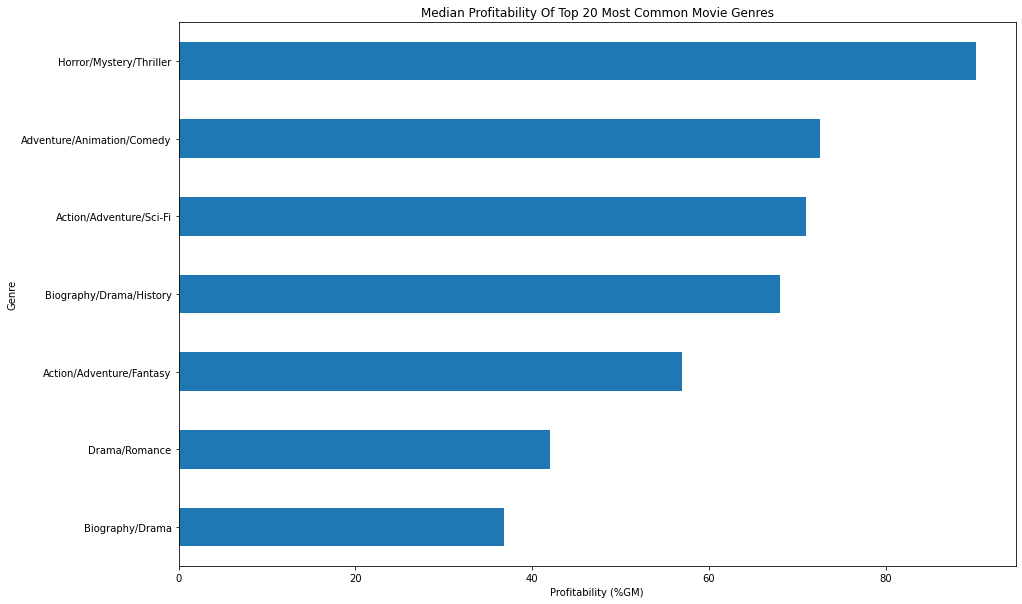

In [18]:
df_idea1_g_grouped = pd.read_csv('data/idea1_genre_grouped.csv')
df_idea1_g_grouped.index = df_idea1_g_grouped['main_genre']

plot_ = df_idea1_g_grouped['gross_margin'][6::-1].plot(kind='barh',xlabel='Genre',ylabel = 'Gross Margin (%)',
                                                  title = 'Median Profitability Of Top 20 Most Common Movie Genres',figsize=(15,10))

plot_.set_xlabel('Profitability (%GM)')

plt.show()

### Plotting Profitability v Movie Budget

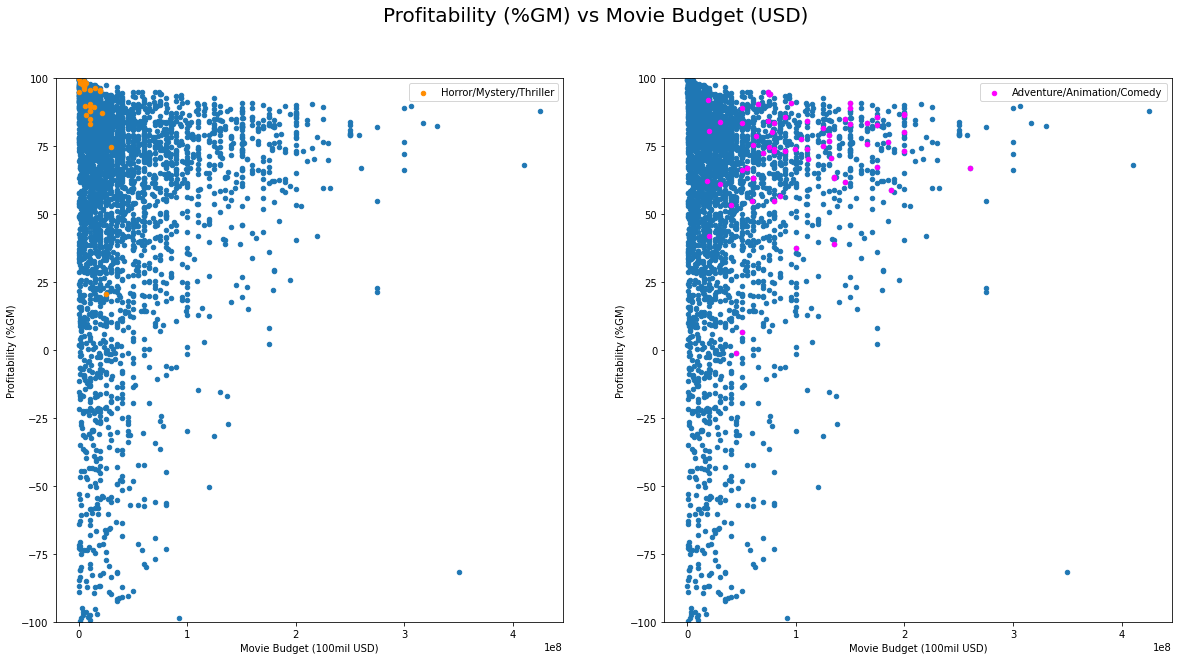

In [20]:
df_idea1_g = pd.read_csv('data/idea1_genre.csv')

# Plotting
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_figheight(10)
fig.set_figwidth(20)

plt1_list = [df_idea1_g_grouped.index[0]]
plt2_list = [df_idea1_g_grouped.index[1]]

df_idea1_g[df_idea1_g['release_year'] >= 2000].plot(ax=axes[0],kind='scatter' , x='budget_int' , y ='gross_margin')
df_idea1_g[(df_idea1_g['release_year'] >= 2000) & (df_idea1_g['main_genre'].isin(plt1_list))].plot(ax=axes[0],kind='scatter',x='budget_int',y='gross_margin',color='DarkOrange',label=plt1_list[0])

df_idea1_g[df_idea1_g['release_year'] >= 2000].plot(ax=axes[1],kind='scatter' , x='budget_int' , y ='gross_margin')
df_idea1_g[(df_idea1_g['release_year'] >= 2000) & (df_idea1_g['main_genre'].isin(plt2_list))].plot(ax=axes[1],kind='scatter',x='budget_int',y='gross_margin',color='Magenta',label=plt2_list[0])

fig.suptitle('Profitability (%GM) vs Movie Budget (USD)',fontsize=20)
for i in [0,1]:
        axes[i].set_ylabel('Profitability (%GM)')
        axes[i].set_xlabel('Movie Budget (100mil USD)')
        axes[i].set_ylim(-100,100)
plt.show()

### Example Horror/Mystery Movies

In [19]:
df_director = pd.read_csv('data/idea1_hmt.csv')
df_director.loc[:4 ,'Movie Title':]

,Movie Title,Budget (USD),Total Gross (USD),Profitability (GM%),Release Year,Average IMDB Rating,Director
0,The Conjuring,"$20,000,000","$455,400,282",95.61,2013,7.5,James Wan
1,Annabelle: Creation,"$15,000,000","$407,477,066",96.32,2017,6.5,David F. Sandberg
2,Annabelle,"$6,500,000","$341,136,733",98.09,2014,5.4,John R. Leonetti
3,Insidious: The Last Key,"$10,000,000","$235,630,918",95.76,2018,5.7,Adam Robitel
4,Happy Death Day,"$5,000,000","$180,694,105",97.23,2017,6.6,Christopher Landon
